epoch: 1, loss = 0.5027
epoch: 11, loss = 0.4308
epoch: 21, loss = 0.3824
epoch: 31, loss = 0.3473
epoch: 41, loss = 0.3207
epoch: 51, loss = 0.2996
epoch: 61, loss = 0.2825
epoch: 71, loss = 0.2682
epoch: 81, loss = 0.2562
epoch: 91, loss = 0.2458
epoch: 101, loss = 0.2367
epoch: 111, loss = 0.2287
epoch: 121, loss = 0.2215
epoch: 131, loss = 0.2151
epoch: 141, loss = 0.2093
epoch: 151, loss = 0.2041
epoch: 161, loss = 0.1992
epoch: 171, loss = 0.1948
epoch: 181, loss = 0.1907
epoch: 191, loss = 0.1869
epoch: 201, loss = 0.1834
epoch: 211, loss = 0.1801
epoch: 221, loss = 0.1770
epoch: 231, loss = 0.1741
epoch: 241, loss = 0.1714
epoch: 251, loss = 0.1688
epoch: 261, loss = 0.1664
epoch: 271, loss = 0.1641
epoch: 281, loss = 0.1619
epoch: 291, loss = 0.1599
epoch: 301, loss = 0.1579
epoch: 311, loss = 0.1560
epoch: 321, loss = 0.1542
epoch: 331, loss = 0.1525
epoch: 341, loss = 0.1509
epoch: 351, loss = 0.1493
epoch: 361, loss = 0.1478
epoch: 371, loss = 0.1464
epoch: 381, loss = 0.14

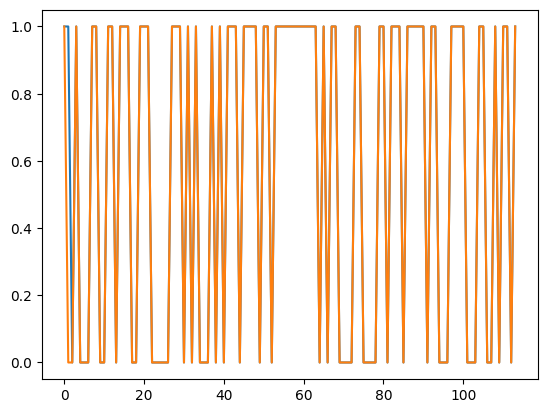

In [77]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
# print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
# print(n_features)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) 
y_test = y_test.view(y_test.shape[0], 1) 


# define model
# f = wx + b, and sigmoid of f

class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted


# Model usage
model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# training loop
num = 1000
for epoch in range(num):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10==1:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
# evaluation
with torch.no_grad(): # evaluation shld not be part of computation, so
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    
    ac = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
    print(f'accuracy = {ac}')
    
plt.plot(y_predicted_cls)
plt.plot(y_test)
plt.show()